In [1]:
from typing import List
from pydantic import BaseModel
import matplotlib.pyplot as plt
import random
import numpy as np

# Defining the models DB
class Point(BaseModel):
    x: int
    y: float

class Line(BaseModel):
    start: Point
    end: Point
    function: str

# Logic for plotting the chart
class Chart(BaseModel):
    points: List[Point] = []
    lines: List[Line] = []

    def add_point(self, point: Point):
        self.points.append(point)
    
    def add_line(self, start: Point, end: Point, function_type: str):
        line = Line(start=start, end=end, function=function_type)
        self.lines.append(line)

    def add_points(self, points: List[Point]):
        self.points.extend(points)
    
    def add_lines(self, lines: List[Line]):
        self.lines.extend(lines)

    def add_function(self, start: Point, end: Point, function_type: str):
        self.add_line(start, end, function_type)
        self.add_points([start, end])

    def exponential_function(self,x1, x2, y1, y2):
    # Create an array of x values from x1 to x2
        x_values = np.arange(x1, x2+1)
        if y1 ==0:
            y1 =1
        # Calculate the base of the exponential function
        base = (y2/y1) ** (1/(x2-x1))

        # Calculate the corresponding y values
        y_values = y1 * base ** (x_values - x1)

        return x_values, y_values
    
    def add_noise_to_y_values_at_integers(self, x_values: np.ndarray, y_values: np.ndarray, noise_level: float):
        y_values_noisy = y_values.copy()
        for i, x in enumerate(x_values[1:-1], start=1):  # Skip the first and last values
            noise = random.uniform(-noise_level, noise_level)
            y_values_noisy[i] += noise
        print(x_values, y_values_noisy)
        return y_values_noisy

    def plot(self):
        plt.figure(figsize=(10, 6))
        for line in self.lines:
            if line.function == "exponential":
                x_values, y_values = self.exponential_function(line.start.x, line.end.x, line.start.y, line.end.y)
            else:
                x_values = np.arange(line.start.x, line.end.x+1)
                m = (line.end.y - line.start.y) / (line.end.x - line.start.x)
                b = line.start.y - m * line.start.x
                y_values = m * x_values + b
            
            
            y_values = self.add_noise_to_y_values_at_integers(x_values, y_values, noise_level=random.randint(1,4)) # Larger noise level
            if line.end.y > line.start.y:
                color = 'green'
            else:
                color = 'red'
            plt.plot(x_values, y_values, color=color)
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('2D Chart with Points and Lines')
        plt.grid(True)
        plt.show()

class GameMaker:

    def __init__(self):
        self.chart = Chart()

    def createStock(self,stock,initial_price):
        self.stock = stock
        self.initial_price = initial_price

    def createPoint (self, x, y):
        point = Point(x=x, y=y)
        return point
    
    def createLine(self, start: Point, end: Point, function_type: str):
        line = Line(start=start, end=end, function=function_type)
        return line
    
    def add_function(self, start: Point, end: Point, function_type: str):
        self.chart.add_function(start, end, function_type)

    def plot(self):
        self.chart.plot()

    
        


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] [100.         100.84095193  99.80331875 100.07766488 100.28230095
 100.00331613 101.51856373 102.15470281 102.34914788 102.10901692
 101.88550439 101.66528996 102.62903374 102.06042451 102.10186574
 102.4516479  103.0148534  102.73357676 104.2868617  103.83385383
 103.78810156 104.28511318 103.88553827 104.35918792 105.4825277
 104.90198185 105.35487065 104.97811913 104.8180212  104.96573183
 106.77103712 106.        ]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61] [106.         108.88463197 110.69299332 110.49776485 114.24641303
 112.7885056  112.50320031 116.07452443 119.1940318  117.63442551
 120.23577342 120.93601203 123.09368942 125.28766271 130.85528219
 131.94791666 129.57215557 136.59556627 136.7203861  135.60770737
 140.38909145 143.59682994 140.48683603 147.95993308 146.15511924
 147.64463442 149.48540665 154.37815757 156.03793195

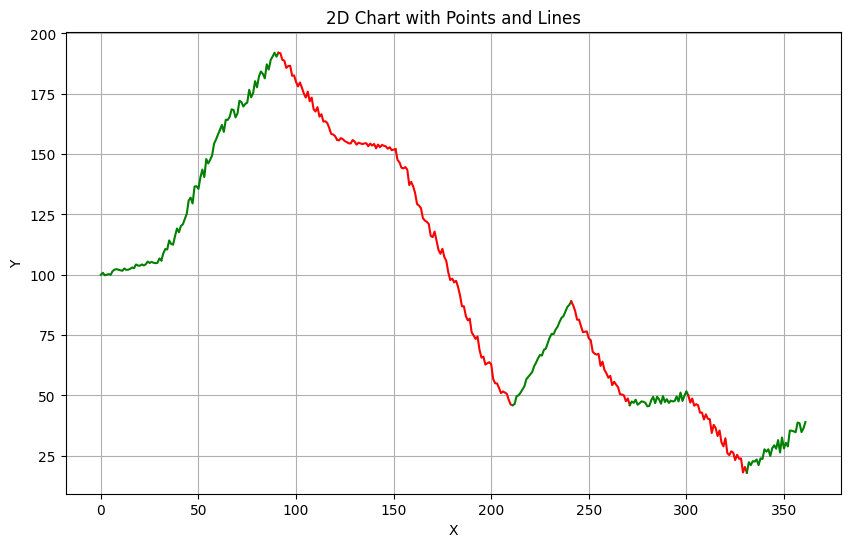

In [2]:
# Example usage:
chart = Chart()

starting_price = 100
time_unit = 365
#Interval of days to create a new function
interval = 30
price_variation = (-60,60)
functions_type = ["exponential", "linear"]
# Noise = True
# functions_list = [1,2,]
# day_increment = [30,30,30,30]
# price_points = [125,115,173,123.12]

# always start next new line with a previous point
previous_point = Point(x=0, y=starting_price)
for i in range(time_unit + 1):
    # previous end point
    if i % interval == 0 and i != 0:
        start = previous_point
        # new end point
        end = Point(x=i+1, y=start.y+random.randint(*price_variation))
        previous_point = end
        chart.add_function(start, end, random.choice(functions_type))


chart.plot()

In [ ]:

# Clear the chart
chart.points = []
chart.lines = []

start_point = Point(x=0, y=0)  # Start at (x0, y0) = (0, 0)
end_point = Point(x=100, y=100)  # End at (x100, y100) = (100, 100)
chart.add_function(start=start_point, end=end_point, function_type="exponential")



# make random points cloud
chart.plot()

In [ ]:
def main():
    game_maker = GameMaker()
    initial_x = 0
    initial_y = 100.0
    previous_point = game_maker.createPoint(initial_x, initial_y)
    
    while True:
        print("\nMenu:")
        print("1. Add new point and plot")
        print("2. Exit")
        choice = input("Click 1 to continue, 2 to exit")

        if choice == '1':
            x2 = int(input("How many days have past: "))
            y2 = float(input("What's the new price: "))
            function_type = input("Enter function type (linear 1/exponential 2): ")

            if function_type == '1':
                function_type = "linear"
            elif function_type == '2':
                function_type = "exponential"
            else:
                print("Invalid function type. Please try again.")
                continue

            next_point = game_maker.createPoint(x2, y2)
            game_maker.add_function(previous_point, next_point, function_type)
            game_maker.plot()
            previous_point = next_point
        elif choice == '2':
            break
        else:
            print("Invalid choice. Please try again.")